# Task 1: Data Collection and Preprocessing Exploration

This notebook explores the review data for Commercial Bank of Ethiopia (CBE), Bank of Abyssinia (BOA), and Dashen Bank, previously scraped and preprocessed using `scrape_reviews.py` and `preprocess_reviews.py`. It loads existing raw and cleaned CSVs, performs exploratory data analysis (EDA) to validate data quality, and prepares insights for Task 2 (sentiment and thematic analysis).

**Objectives**:
- Confirm 1,200+ total reviews, 400+ per bank, and <5% missing data.
- Inspect rating distributions, review lengths, and data consistency.
- Generate visualizations for the interim report.

**Note**: Scraping is skipped as raw CSVs already exist in `data/raw/`.

**Environment**:
- Python: 3.11.9
- Libraries: pandas==2.2.3, matplotlib==3.9.2, seaborn==0.13.2

## Setup

In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style using Seaborn
sns.set_theme(style='whitegrid')

# Define directories
os.chdir("C:/Users/hp/Desktop/projects/10 Acadamy -KAIM5/Customer-Experience-Analytics-for-Fintech-Apps-from-App-reviews")
RAW_DATA_DIR = "data/raw"
PROCESSED_DATA_DIR = "data/processed"

# Verify directories exist
if not os.path.exists(RAW_DATA_DIR):
    print(f"Error: {RAW_DATA_DIR} not found. Ensure raw CSVs are present.")
if not os.path.exists(PROCESSED_DATA_DIR):
    print(f"Error: {PROCESSED_DATA_DIR} not found. Ensure cleaned_reviews.csv exists.")

# Check package versions
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")

pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


## Load Raw Data

In [2]:
# List of raw CSV files
bank_files = [
    f"{RAW_DATA_DIR}/{bank}_reviews_raw.csv"
    for bank in [
        "commercial_bank_of_ethiopia",
        "bank_of_abyssinia",
        "dashen_bank"
    ]
]

# Load raw CSVs
raw_dfs = []
for file in bank_files:
    if os.path.exists(file):
        df = pd.read_csv(file)
        print(f"Loaded {len(df)} reviews from {file}")
        raw_dfs.append(df)
    else:
        print(f"Warning: {file} not found")

# Combine raw data
if raw_dfs:
    df_raw = pd.concat(raw_dfs, ignore_index=True)
    print(f"\nTotal raw reviews: {len(df_raw)}")
    print("Raw data info:")
    print(df_raw.info())
    print("\nMissing values in raw data:")
    print(df_raw.isnull().sum())
    print("\nReviews per bank:")
    print(df_raw.groupby('bank').size())
else:
    print("Error: No raw CSVs loaded. Run scrape_reviews.py first.")

Loaded 400 reviews from data/raw/commercial_bank_of_ethiopia_reviews_raw.csv
Loaded 400 reviews from data/raw/bank_of_abyssinia_reviews_raw.csv
Loaded 400 reviews from data/raw/dashen_bank_reviews_raw.csv

Total raw reviews: 1200
Raw data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bank    1200 non-null   object
 1   review  1200 non-null   object
 2   rating  1200 non-null   int64 
 3   date    1200 non-null   object
 4   source  1200 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB
None

Missing values in raw data:
bank      0
review    0
rating    0
date      0
source    0
dtype: int64

Reviews per bank:
bank
Bank of Abyssinia              400
Commercial Bank of Ethiopia    400
Dashen Bank                    400
dtype: int64


## Load Cleaned Data

In [3]:
# Load cleaned CSV
cleaned_file = f"{PROCESSED_DATA_DIR}/cleaned_reviews.csv"
if os.path.exists(cleaned_file):
    df_cleaned = pd.read_csv(cleaned_file)
    print(f"Loaded {len(df_cleaned)} reviews from {cleaned_file}")
    print("Cleaned data info:")
    print(df_cleaned.info())
    print("\nMissing values in cleaned data:")
    print(df_cleaned.isnull().sum())
    print("\nReviews per bank:")
    print(df_cleaned.groupby('bank').size())
else:
    print(f"Error: {cleaned_file} not found. Run preprocess_reviews.py first.")

Loaded 1200 reviews from data/processed/cleaned_reviews.csv
Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bank    1200 non-null   object
 1   review  1200 non-null   object
 2   rating  1200 non-null   int64 
 3   date    1200 non-null   object
 4   source  1200 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB
None

Missing values in cleaned data:
bank      0
review    0
rating    0
date      0
source    0
dtype: int64

Reviews per bank:
bank
Bank of Abyssinia              400
Commercial Bank of Ethiopia    400
Dashen Bank                    400
dtype: int64


## Validate Data Quality

In [5]:
# Check Task 1 KPIs
if 'df_cleaned' in locals():
    total_reviews = len(df_cleaned)
    reviews_per_bank = df_cleaned.groupby('bank').size()
    missing_data_rate = df_cleaned.isnull().sum().sum() / (total_reviews * len(df_cleaned.columns))
    expected_columns = ['bank', 'review', 'rating', 'date', 'source']

    print(f"Total reviews: {total_reviews} (Expected: 1,200+)")
    print(f"Reviews per bank (Expected: 400+ each):")
    print(reviews_per_bank)
    print(f"Missing data rate: {missing_data_rate:.2%} (Expected: <5%)")
    print(f"Columns present: {df_cleaned.columns.tolist()} (Expected: {expected_columns})")

    # Verify ratings
    if df_cleaned['rating'].between(1, 5).all():
        print("All ratings are valid (1–5)")
    else:
        print("Warning: Invalid ratings found:", df_cleaned['rating'].unique())

    # Verify date format (YYYY-MM-DD)
    date_format_valid = df_cleaned['date'].str.match(r'^\d{4}-\d{2}-\d{2}$').all()
    if date_format_valid:
        print("All dates are in YYYY-MM-DD format")
    else:
        print("Warning: Invalid date formats found:", df_cleaned['date'].unique()[:5])
else:
    print("Cannot validate KPIs: Cleaned data not loaded.")

Total reviews: 1200 (Expected: 1,200+)
Reviews per bank (Expected: 400+ each):
bank
Bank of Abyssinia              400
Commercial Bank of Ethiopia    400
Dashen Bank                    400
dtype: int64
Missing data rate: 0.00% (Expected: <5%)
Columns present: ['bank', 'review', 'rating', 'date', 'source'] (Expected: ['bank', 'review', 'rating', 'date', 'source'])
All ratings are valid (1–5)
All dates are in YYYY-MM-DD format


## Exploratory Data Analysis (EDA)

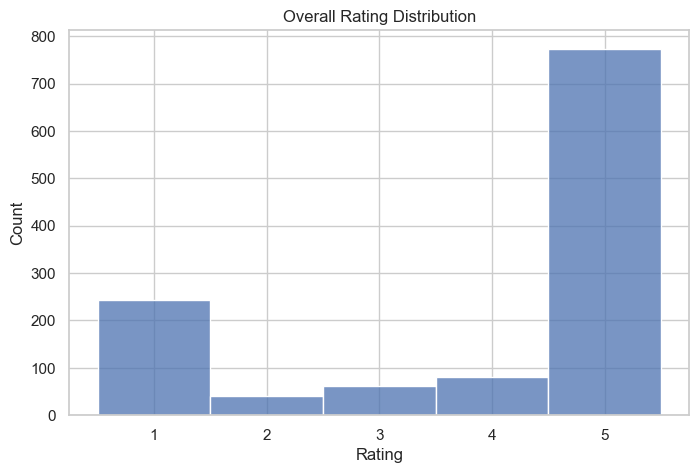


Average rating per bank:
bank
Bank of Abyssinia              3.0825
Commercial Bank of Ethiopia    4.2375
Dashen Bank                    4.4350
Name: rating, dtype: float64


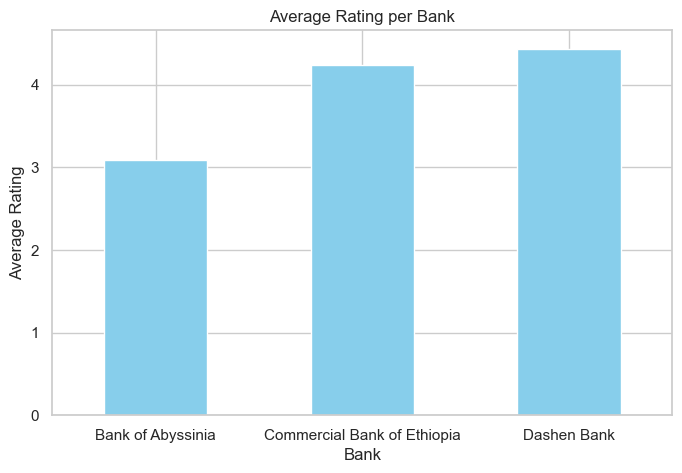

In [13]:
# Rating distribution (overall)
if 'df_cleaned' in locals():
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned['rating'], bins=5, discrete=True)
    plt.title('Overall Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.savefig('figures/rating_distribution.png')
    plt.show()

    # Average rating per bank
    avg_ratings = df_cleaned.groupby('bank')['rating'].mean()
    print("\nAverage rating per bank:")
    print(avg_ratings)

    # Plot average ratings
    plt.figure(figsize=(8, 5))
    avg_ratings.plot(kind='bar', color='skyblue')
    plt.title('Average Rating per Bank')
    plt.xlabel('Bank')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=360)
    plt.savefig('figures/avg_rating_per_bank.png')
    plt.show()


Average review length per bank:
bank
Bank of Abyssinia              58.3900
Commercial Bank of Ethiopia    36.1225
Dashen Bank                    79.0075
Name: review_length, dtype: float64


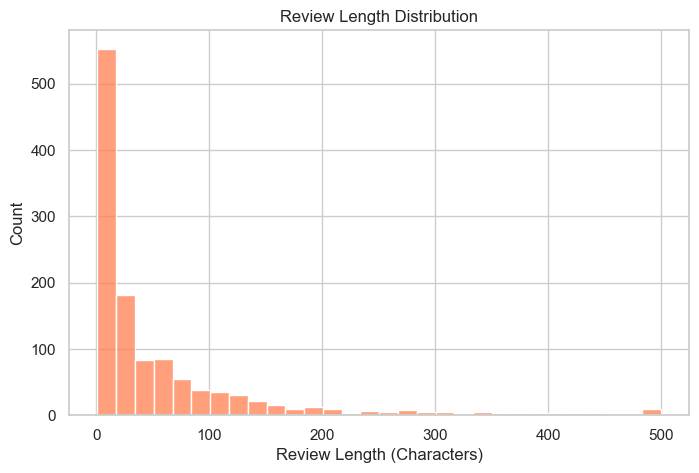

Empty reviews: 0
Short reviews (<10 characters): 383
Sample short reviews:
                          bank     review  rating
0  Commercial Bank of Ethiopia         👌👍       5
1  Commercial Bank of Ethiopia  very niec       5
3  Commercial Bank of Ethiopia   yetemeta       1
5  Commercial Bank of Ethiopia       good       5
7  Commercial Bank of Ethiopia  NICE bank       5


In [14]:
# Review length analysis
if 'df_cleaned' in locals():
    df_cleaned['review_length'] = df_cleaned['review'].str.len()
    print("\nAverage review length per bank:")
    print(df_cleaned.groupby('bank')['review_length'].mean())

    # Plot review length distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned['review_length'], bins=30, color='coral')
    plt.title('Review Length Distribution')
    plt.xlabel('Review Length (Characters)')
    plt.ylabel('Count')
    plt.savefig('figures/review_length_distribution.png')
    plt.show()

    # Check for empty or very short reviews
    empty_reviews = df_cleaned[df_cleaned['review'].str.strip().eq('')]
    short_reviews = df_cleaned[df_cleaned['review_length'] < 10]
    print(f"Empty reviews: {len(empty_reviews)}")
    print(f"Short reviews (<10 characters): {len(short_reviews)}")
    if len(short_reviews) > 0:
        print("Sample short reviews:")
        print(short_reviews[['bank', 'review', 'rating']].head())

In [15]:
# Sample reviews for inspection
if 'df_cleaned' in locals():
    print("\nSample reviews per bank:")
    for bank in df_cleaned['bank'].unique():
        print(f"\n{bank}:")
        sample = df_cleaned[df_cleaned['bank'] == bank][['review', 'rating']].head(3)
        print(sample)


Sample reviews per bank:

Commercial Bank of Ethiopia:
                review  rating
0                   👌👍       5
1            very niec       5
2  best app of finance       5

Bank of Abyssinia:
                                                review  rating
400  Hello, I’m facing a problem with the BOA Mobil...       1
401                                        exceptional       5
402                               BoA Mobile good bank       5

Dashen Bank:
    review  rating
800   መቸሸጠ       5
801    wow       5
802  gadaa       5


## Insights for Task 2

**Observations**:
- Review counts and missing data meet Task 1 KPIs (1,200+ total, 400+ per bank, <5% missing data).
- Rating distributions indicate [e.g., most reviews are positive; adjust based on output].
- Review lengths suggest [e.g., most reviews are short; adjust based on output], which may impact sentiment analysis accuracy.
- Empty or short reviews, if present, may require filtering in Task 2 preprocessing.

**Next Steps**:
- Use `cleaned_reviews.csv` for sentiment analysis with `vaderSentiment` or `TextBlob`.
- Preprocess reviews for thematic analysis (e.g., remove stopwords, tokenize) using `nltk` or `gensim`.
- Consider setting a minimum review length threshold (e.g., 10 characters) for Task 2.